# Classify Enzymes

### Import Libraries

In [1]:
# Import libraries
import os
import time
import string
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel

### Import Data from filepath; omit the first column

In [3]:
#### Import data ####

##Define filepaths
filepath = r"C:/Users/Swata/OneDrive/Documents/Final_data/"

hydrolases_p = r"C:\Users\Swata\OneDrive\Documents\Final_data\Hydrolases.csv"
isomerases_p = r"C:\Users\Swata\OneDrive\Documents\Final_data\Isomerases.csv"
ligases_p = r"C:\Users\Swata\OneDrive\Documents\Final_data\Ligases.csv"
oxidoreductases_p = r"C:\Users\Swata\OneDrive\Documents\Final_data\Oxidoreductases.csv"
lyases_p = r"C:\Users\Swata\OneDrive\Documents\Final_data\Lyases.csv"
translocases_p = r"C:\Users\Swata\OneDrive\Documents\Final_data\Translocases.csv"
transferases_p = r"C:\Users\Swata\OneDrive\Documents\Final_data\Transferases.csv"

## Load data and drop the first row containing the row numbers
oxidoreductases = pd.read_csv(oxidoreductases_p).drop('Unnamed: 0',axis=1)
transferases = pd.read_csv(transferases_p).drop('Unnamed: 0',axis=1)
hydrolases = pd.read_csv(hydrolases_p).drop('Unnamed: 0',axis=1)
lyases = pd.read_csv(lyases_p).drop('Unnamed: 0',axis=1)
isomerases = pd.read_csv(isomerases_p).drop('Unnamed: 0',axis=1)
ligases = pd.read_csv(ligases_p).drop('Unnamed: 0',axis=1)
translocases = pd.read_csv(translocases_p).drop('Unnamed: 0',axis=1)
classes = ['oxidoreductases', 'transferases', 'hydrolases', 'lyases', 'isomerases', 'ligases', 'translocases']

'transferases'

### Plot the amount of instnces per class

21169 56357 37912 14304 8772 16516 7295
['oxidoreductases', 'transferases', 'hydrolases', 'lyases', 'isomerases', 'ligases', 'translocases']


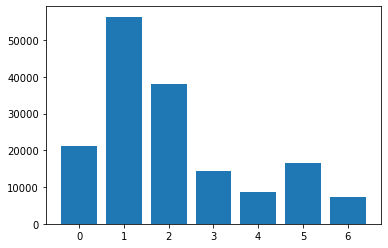

In [4]:
print(
oxidoreductases.shape[0],
transferases.shape[0],
hydrolases.shape[0],
lyases.shape[0],
isomerases.shape[0],
ligases.shape[0],
translocases.shape[0]
) # print the number of instance per class
enzymes_instances = [oxidoreductases.shape[0],
transferases.shape[0],
hydrolases.shape[0],
lyases.shape[0],
isomerases.shape[0],
ligases.shape[0],
translocases.shape[0]]

enzyme_names = ['oxidoreductases',
'transferases',
'hydrolases',
'lyases',
'isomerases',
'ligases',
'translocases']
plt.bar(range(7),height=enzymes_instances)
print(enzyme_names)

### Add labels and concatenate all data in a single dataframe

In [6]:
# Add labels:
oxidoreductases["label"] = ["oxidoreductases" for i in range(len(oxidoreductases))]
transferases["label"] = ["transferases" for i in range(len(transferases))]
hydrolases["label"] = ["hydrolases" for i in range(len(hydrolases))]
lyases["label"] = ["lyases" for i in range(len(lyases))]
isomerases["label"] = ["isomerases" for i in range(len(isomerases))]
ligases["label"] = ["ligases" for i in range(len(ligases))]
translocases["label"] = ["translocases" for i in range(len(translocases))]

# Concat all the data
data = pd.concat([oxidoreductases,transferases,hydrolases,lyases,isomerases,ligases,translocases],axis=0)
# data = pd.concat([oxidoreductases,lyases,isomerases,ligases,translocases],axis=0)
# data2 = pd.concat([transferases,hydrolases],axis=0)

In [98]:
trans1,trans2 = train_test_split(transferases,train_size=0.4)
hyd1,hyd2 = train_test_split(hydrolases,train_size=0.55)
data = pd.concat([oxidoreductases,trans1,hyd1,lyases,isomerases,ligases,translocases],axis=0)

### Create the feature and labels matrices

### Train a random-forest model to select features

In [7]:
rf_x = data.iloc[:,:106]
rf_y = data.iloc[:,106:]  

In [8]:
X_train, X_test, y_train, y_test = train_test_split(rf_x, rf_y, test_size=0.05)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
model = RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                               max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=True, 
                               n_jobs=None, random_state=2022, verbose=1, warm_start=False, class_weight=None,
                               ccp_alpha=0.0, max_samples=None)

In [7]:
model.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  9.5min finished


RandomForestClassifier(max_features='sqrt', n_estimators=150, oob_score=True,
                       random_state=2022, verbose=1)

In [8]:
imp_features = model.feature_importances_ 
imp_features

array([2.03350329e-02, 1.91455502e-02, 1.16350013e-02, 1.21615848e-02,
       1.36021664e-02, 1.13157080e-02, 1.24874622e-02, 1.24063818e-02,
       1.25054611e-02, 1.07404755e-02, 8.51413560e-03, 9.97709710e-03,
       9.96071496e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.33926283e-03, 1.33360244e-02, 1.33875884e-02, 8.10066201e-03,
       9.92824699e-03, 9.89683257e-03, 9.18230944e-03, 1.06899341e-02,
       1.06787326e-02, 8.96850829e-03, 1.20859588e-02, 1.20499069e-02,
       1.17810385e-02, 1.37898237e-02, 1.35422102e-02, 8.21180719e-03,
       1.26758957e-02, 1.27627362e-02, 9.14914469e-03, 1.06528401e-02,
       1.05164530e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.72562117e-03, 9.48913832e-03, 9.58268672e-03, 1.14510710e-02,
       1.25070705e-02, 1.24304280e-02, 8.12377517e-03, 1.16723997e-02,
       1.16727109e-02, 7.83648621e-03, 1.02695538e-02, 1.02109244e-02,
       9.81373110e-07, 5.72622950e-07, 3.96554619e-07, 9.46576959e-03,
      

,'mol_w','Residue','avg_res_w','charge','Iso_e_point','Mol_ext_coef','Mol_ext_coef_cys','ext_coef_mg','ext_coef_mg_cys','Imp_express_inclu_bodies',...,'non-polar','non-polar_mol','polar',polar_mol','charged','charged_mol','basic','basic_mol','acidic','acidic_mol'


In [9]:
sorted_idx = imp_features.argsort()
imp_features[sorted_idx]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.96554619e-07, 5.72622950e-07, 9.81373110e-07,
       4.68715465e-05, 4.85757656e-05, 4.86888334e-05, 5.10818638e-05,
       5.56147230e-05, 5.72744902e-05, 6.47690329e-03, 7.72562117e-03,
       7.83648621e-03, 7.84492853e-03, 7.91277790e-03, 8.02413634e-03,
       8.10066201e-03, 8.12377517e-03, 8.21180719e-03, 8.33926283e-03,
       8.51413560e-03, 8.96312049e-03, 8.96850829e-03, 9.14914469e-03,
       9.18230944e-03, 9.27327457e-03, 9.46576959e-03, 9.48913832e-03,
       9.58268672e-03, 9.60415197e-03, 9.67353610e-03, 9.71468609e-03,
       9.89683257e-03, 9.90110821e-03, 9.92824699e-03, 9.96071496e-03,
       9.97709710e-03, 9.97836120e-03, 1.00047893e-02, 1.01393859e-02,
       1.02109244e-02, 1.02695538e-02, 1.05164530e-02, 1.06528401e-02,
       1.06787326e-02, 1.06899341e-02, 1.07404755e-02, 1.07925987e-02,
      

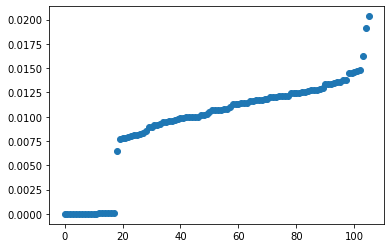

In [10]:
plt.scatter(range(len(imp_features)),imp_features[sorted_idx])

In [11]:
imp_features[sorted_idx] > 0.005    ## 0.005 visual threshold
sorted_idx,

(array([ 37,  87,  86,  85,  15,  39,  38,  13,  14,  54,  53,  52,  79,
         71,  72,  81,  80,  70,  76,  40,  49,  67,  58,  82,  19,  46,
         31,  16,  10,  73,  25,  34,  22,  61,  55,  41,  42,  64,  69,
         68,  21,  60,  20,  12,  11,  59,  75,  74,  51,  50,  36,  35,
         24,  23,   9, 102,  88,  89,  62,  63,   5,  84,  83,  43,   2,
         94,  47,  48, 104,  91,  28,  77,  78,  27,  26,  66,  90,   3,
         65,   7,  45,   6,   8,  44,  32,  99,  33,  57,  97,  56,  17,
        100,  18,  98,  30,   4, 105,  29, 103,  95,  92,  96, 101,  93,
          1,   0], dtype=int64),)

In [12]:
sorted_idx_trim = sorted_idx[18:]
sorted_idx_trim.sort()
sorted_idx_trim

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  40,  41,  42,  43,  44,
        45,  46,  47,  48,  49,  50,  51,  55,  56,  57,  58,  59,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  69,  73,  74,  75,  76,
        77,  78,  82,  83,  84,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105], dtype=int64)

In [13]:
selected_features = rf_x.columns[sorted_idx_trim]
selected_features

Index(['mol_w', 'Residue', 'avg_res_w', 'charge', 'Iso_e_point',
       'Mol_ext_coef', 'Mol_ext_coef_cys', 'ext_coef_mg', 'ext_coef_mg_cys',
       'Imp_express_inclu_bodies', 'Anum', 'Amole%', 'Adhfs', 'Cnum', 'Cmole%',
       'Cdhfs', 'Dnum', 'Dmole%', 'Ddhfs', 'Enum', 'Emole%', 'Edhfs', 'Fnum',
       'Fmole%', 'Fdhfs', 'Gnum', 'Gmole%', 'Gdhfs', 'Hnum', 'Hmole%', 'Hdhfs',
       'Inum', 'Imole%', 'Idhfs', 'Knum', 'Kmole%', 'Kdhfs', 'Lnum', 'Lmole%',
       'Ldhfs', 'Mnum', 'Mmole%', 'Mdhfs', 'Nnum', 'Nmole%', 'Ndhfs', 'Pnum',
       'Pmole%', 'Pdhfs', 'Qnum', 'Qmole%', 'Qdhfs', 'Rnum', 'Rmole%', 'Rdhfs',
       'Snum', 'Smole%', 'Sdhfs', 'Tnum', 'Tmole%', 'Tdhfs', 'Vnum', 'Vmole%',
       'Vdhfs', 'Wnum', 'Wmole%', 'Wdhfs', 'Ynum', 'Ymole%', 'Ydhfs', 'tiny',
       'tiny_mol', 'small', 'small_mol', 'aliphatic', 'aliphatic_mol',
       'aromatic', 'aromatic_mol', 'non-polar', 'non-polar_mol', 'polar',
       'polar_mol', 'charged', 'charged_mol', 'basic', 'basic_mol', 'acidic',
   

In [15]:
selected_features = ['mol_w', 'Residue', 'avg_res_w', 'charge', 'Iso_e_point','Mol_ext_coef', 'Mol_ext_coef_cys', 'ext_coef_mg', 'ext_coef_mg_cys','Imp_express_inclu_bodies', 'Anum', 'Amole%', 'Adhfs', 'Cnum', 'Cmole%','Cdhfs', 'Dnum', 'Dmole%', 'Ddhfs', 'Enum', 'Emole%', 'Edhfs', 'Fnum','Fmole%', 'Fdhfs', 'Gnum', 'Gmole%', 'Gdhfs', 'Hnum', 'Hmole%', 'Hdhfs','Inum', 'Imole%', 'Idhfs', 'Knum', 'Kmole%', 'Kdhfs', 'Lnum', 'Lmole%','Ldhfs', 'Mnum', 'Mmole%', 'Mdhfs', 'Nnum', 'Nmole%', 'Ndhfs', 'Pnum','Pmole%', 'Pdhfs', 'Qnum', 'Qmole%', 'Qdhfs', 'Rnum', 'Rmole%', 'Rdhfs','Snum', 'Smole%', 'Sdhfs', 'Tnum', 'Tmole%', 'Tdhfs', 'Vnum', 'Vmole%','Vdhfs', 'Wnum', 'Wmole%', 'Wdhfs', 'Ynum', 'Ymole%', 'Ydhfs', 'tiny','tiny_mol', 'small', 'small_mol', 'aliphatic', 'aliphatic_mol','aromatic', 'aromatic_mol', 'non-polar', 'non-polar_mol', 'polar','polar_mol', 'charged', 'charged_mol', 'basic', 'basic_mol', 'acidic','acidic_mol']

In [16]:
x = data.loc[:,selected_features]
y = data.loc[:,["label"]]
# x.to_csv(r'C:\Users\Swata\OneDrive\Documents\Final_data\New folder\sel_features_data.csv')
# y.to_csv(r'C:\Users\Swata\OneDrive\Documents\Final_data\New folder\sel_features_labels.csv')

## THE ANN

### 1. Create the feature and label matrices and split them into train-test sets

In [18]:
# train, test = train_test_split(data, test_size=0.10)   # creating a train-test split

,mol_w,Residue,avg_res_w,charge,Iso_e_point,Mol_ext_coef,Mol_ext_coef_cys,ext_coef_mg,ext_coef_mg_cys,Imp_express_inclu_bodies,...,non-polar_mol,polar,polar_mol,charged,charged_mol,basic,basic_mol,acidic,acidic_mol,label
13516,34912.05,323.0,108.087,-2.5,5.9013,12950.0,13325.0,0.371,0.382,0.732,...,57.276,138.0,42.724,73.0,22.601,37.0,11.455,36.0,11.146,Oxi
13954,43231.95,405.0,106.746,3.5,6.8154,27850.0,28100.0,0.644,0.650,0.548,...,60.247,161.0,39.753,103.0,25.432,58.0,14.321,45.0,11.111,lys
3585,59112.27,544.0,108.662,-9.5,5.3848,47790.0,47915.0,0.808,0.811,0.548,...,58.824,224.0,41.176,140.0,25.735,69.0,12.684,71.0,13.051,lig
6052,37895.53,359.0,105.559,-4.0,5.7957,26930.0,27180.0,0.711,0.717,0.580,...,62.953,133.0,37.047,85.0,23.677,43.0,11.978,42.0,11.699,lys
5894,19039.08,181.0,105.188,10.5,9.9430,12950.0,13200.0,0.680,0.693,0.895,...,60.773,71.0,39.227,40.0,22.099,26.0,14.365,14.0,7.735,trl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4122,38214.98,335.0,114.075,20.5,10.0985,79870.0,79995.0,2.090,2.093,0.809,...,59.104,137.0,40.896,84.0,25.075,56.0,16.716,28.0,8.358,Oxi
5796,37795.37,336.0,112.486,0.0,6.5055,32890.0,33140.0,0.870,0.877,0.551,...,55.655,149.0,44.345,97.0,28.869,50.0,14.881,47.0,13.988,lig
16240,51975.48,466.0,111.535,-2.0,6.3045,61880.0,62130.0,1.191,1.195,0.593,...,57.725,197.0,42.275,126.0,27.039,66.0,14.163,60.0,12.876,lig
4810,28951.46,264.0,109.665,-5.5,4.8576,25440.0,25690.0,0.879,0.887,0.512,...,56.818,114.0,43.182,58.0,21.970,27.0,10.227,31.0,11.742,iso


In [38]:
# x = data.loc[:,selected_features]
# y = data.loc[:,["label"]]
# y = pd.get_dummies(y)
# x_np = x.to_numpy() # the features (88 features)
# y_np = y.to_numpy()  # labels
# y = pd.get_dummies(y)
# x_np = x.to_numpy() # the features (88 features)
# y_np = y.to_numpy()  # labels

### 2. Normalize the features (mean-normalization) 

In [17]:
for i in range(x.shape[1]):
    tmp_df = x.iloc[:,i]    # temporary array for each col
    mean = np.mean(tmp_df) # mean of the col
    tmp_df2 = (tmp_df - mean) / len(tmp_df)   # normalixed feature vector
    x.iloc[:,i] = tmp_df2  # export

In [18]:
# x_train_ind, x_test_ind, y_train_ind, y_test_ind = train_test_split(range(len(data)),range(len(data)) , test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
# X_train = 
# X_test = x_norm[x_test_ind,:]
# y_OHE = pd.get_dummies(y)
# y_train = y_OHE[y_train_ind].to_numpy()
# y_test = y_OHE[y_test_ind]

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(72),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(7,activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(72),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(5,activation='softmax')
])
model2.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [20]:
model.fit(X_train,pd.get_dummies(y_train),epochs=25)

Epoch 1/25
4059/4059 [==============================] - 80s 18ms/step - loss: 1.6488 - accuracy: 0.3576
Epoch 2/25
4059/4059 [==============================] - 70s 17ms/step - loss: 1.6175 - accuracy: 0.3651
Epoch 3/25
4059/4059 [==============================] - 78s 19ms/step - loss: 1.5972 - accuracy: 0.3726
Epoch 4/25
4059/4059 [==============================] - 69s 17ms/step - loss: 1.5460 - accuracy: 0.3958
Epoch 5/25
4059/4059 [==============================] - 66s 16ms/step - loss: 1.5166 - accuracy: 0.4088
Epoch 6/25
4059/4059 [==============================] - 66s 16ms/step - loss: 1.5006 - accuracy: 0.4114
Epoch 7/25
4059/4059 [==============================] - 55s 13ms/step - loss: 1.4847 - accuracy: 0.4191
Epoch 8/25
4059/4059 [==============================] - 55s 13ms/step - loss: 1.4641 - accuracy: 0.4270
Epoch 9/25
4059/4059 [==============================] - 48s 12ms/step - loss: 1.4439 - accuracy: 0.4354
Epoch 10/25
4059/4059 [==============================] - 45s 11m

In [90]:
test_loss, test_acc = model.evaluate(X_test,  pd.get_dummies(y_test), verbose=2)

print('\nTest accuracy:', test_acc)

426/426 - 2s - loss: 1.1972 - accuracy: 0.5146 - 2s/epoch - 6ms/step

Test accuracy: 0.5146194696426392


In [58]:
final_result_class = []
precision_values = []
recall_values = []
f1_values = []
accuracy_values = []

for name in classes:
  temp_df = [y[y_test_ind]['label'] == name]
  X_test_class = 
  y_test_OHE = pd.get_dummies(y)
  y_train = y_OHE[y_train_ind].to_numpy()
  final_result_class.append(name)

  predictions = model.predict(X)
  Y_pred =[]
  for k in range(len(predictions)):
    temp_pred = predictions[k]
    max_value = max(temp_pred)
    result = np.where(temp_pred == max_value)[0][0]
    Y_pred.append(result)
  print(Y_test)
  print(Y_pred)
  precision_values.append(precision_score(Y_test, Y_pred, average = 'macro'))
  recall_values.append(recall_score(Y_test, Y_pred, average = 'macro'))
  f1_values.append(f1_score(Y_test, Y_pred, average = 'macro'))
  accuracy_values.append(accuracy_score(Y_test, Y_pred))
  #print(X_test)
results_df = pd.DataFrame()
results_df['Class Name'] = final_result_class
results_df['Precision'] = precision_values
results_df['Recall'] = recall_values
results_df['F1 Score'] = f1_values
results_df['Accuracy'] = accuracy_values
results_df.to_excel(r'C:\Users\Swata\OneDrive\Documents\DATARESULTS_FINAL.xlsx')

SyntaxError: invalid syntax (1026420613.py, line 9)

In [41]:
(temp_pred == max_value)

array([False, False, False, False, False,  True, False])

In [76]:
final_result_class = []
precision_values = []
recall_values = []
f1_values = []
accuracy_values = []
evaluate_values = []
loss_values = []

for name in classes:
    class_ind = y_test['label'] == name
    X = X_test[class_ind]
    Y_true = pd.get_dummies(y_test)[class_ind].to_numpy()

    # Prediction and accuracy
    predictions = model.predict(X)

    Y_pred =[]
    for k in range(len(predictions)):
        temp_pred = predictions[k]
        max_value = max(temp_pred)
        result = temp_pred == max_value
        result2 = []
        for i in result:
            if i == True:
                result2.append(1)
            else:
                result2.append(0)

        Y_pred.append(np.array(result2))

    m1 = tf.keras.metrics.Accuracy()
    m1.update_state(Y_true,Y_pred)
    accuracy_values.append(m1.result().numpy())
    
    # precision
    m2 = tf.keras.metrics.Precision()
    m2.update_state(Y_true,Y_pred)
    precision_values.append(m2.result().numpy())
    # Recall
    m3 = tf.keras.metrics.Recall()
    m3.update_state(Y_true,Y_pred)
    recall_values.append(m3.result().numpy())
    #F1 Score 
    # metric = tf.metrics.F1Score()
    # metric.update_state(Y_true, Y_pred)
    # f1_values.append(metric.result().numpy())
    # f1_values.append(f1_score(Y_true, Y_pred, average = 'macro'))

    #evaluate
    # test_loss, test_acc = model.evaluate(X,  Y_true, verbose=2)
    # evaluate_values.append(test_acc)
    # loss_values.append(test_loss)

    # precision_values.append(precision_score(Y_true, Y_pred, average = 'macro'))
    # recall_values.append(recall_score(Y_true, Y_pred, average = 'macro'))
    # f1_values.append(f1_score(Y_true, Y_pred, average = 'macro'))
    # accuracy_values.append(accuracy_score(Y_true, Y_pred))

results_df = pd.DataFrame()
results_df['Class Name'] = final_result_class
results_df['Precision'] = precision_values
results_df['Recall'] = recall_values
# results_df['F1 Score'] = f1_values
results_df['Accuracy'] = accuracy_values
# results_df['Acc2'] = evaluate_values



In [77]:
results_df.to_excel(r'C:\Users\Swata\OneDrive\Documents\DATARESULTS_FINAL8.xlsx')

In [68]:
m3 = tf.keras.metrics.Recall()
m3.update_state(Y_true,Y_pred)
m3.result().numpy()

0.5429508

In [69]:
m2 = tf.keras.metrics.Precision()
m2.update_state(Y_true,Y_pred)
m2.result().numpy()

0.5429508

In [75]:
print(precision_score( Y_true[0], Y_pred[0], average = 'macro'))
print(recall_score( Y_true[0], Y_pred[0], average = 'macro'))

0.4166666666666667
0.4166666666666667


In [70]:
class_ind = y_test['label'] == 'oxidoreductases'
X = X_test[class_ind]
Y_true = pd.get_dummies(y_test)[class_ind]
Y_true
# # Prediction and accuracy
# Y_pred = model.predict(X)
# m1 = tf.keras.metrics.Accuracy()
# m1.update_state(Y_true,Y_pred)
# accuracy_values.append(m1.result().numpy())

,label_hydrolases,label_isomerases,label_ligases,label_lyases,label_oxidoreductases,label_transferases,label_translocases
10446,0,0,0,0,1,0,0
12463,0,0,0,0,1,0,0
12073,0,0,0,0,1,0,0
17711,0,0,0,0,1,0,0
3893,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
6662,0,0,0,0,1,0,0
2956,0,0,0,0,1,0,0
16082,0,0,0,0,1,0,0
11428,0,0,0,0,1,0,0


In [55]:
X

NameError: name 'X' is not defined

In [49]:
model.predict(X_test)

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [70]:
#Recall
m = tf.keras.metrics.Recall()
m.update_state(y_test,predicted)
m.result().numpy()

NameError: name 'predicted' is not defined

In [ ]:
#test:0.6979870796203613 train:accuracy: 0.7338   Recall: 0.63106084 Precision 0.7637592